# Input chanel synchronization

## Time synchronization

The test monitoring includes several sources of sensing, such as load scenario, LVDT measurements, DIC surface data and fiber-optical measurements inside a specimen. Each of these sources has its own clock which needs to be synchronized before processing the data. The synchronization is done by finding the time shift between the signals and then applying the shift to all the signals. There are the following options for synchronization:

 - manual synchronization, and
 - automatic synchronization using a shared sensor chanel,

Manual synchronization is done by explicitly capturing the time shift between two signals during the test setup, for example by making a photo of the displays capturing the clock running during the experiment.

Automatic synchronization can be used if two channels, e.g. if the load cell channel is connected both to the LVDT and DIC measurement. In this case, the software can automatically find the time shift between the two signals and apply it to all the other signals. This method is used here and it is described in the following.
 

Assuming there are two sources delivering time dependent data, let us consider $x_1(t_1)$ and $x_2(t_1)$, where $t_1, t_2$ are the variables in the recording of the two data channels. They are shifted by $\Delta t_{12}$ so that 
$$
 t_1 = t_2 + \Delta t_{12}.
$$

## Control scale

The interpolators are constructed along one of three possible control variables: $F$, $w$ and $t$. The minimum and maximum value of these variables is set via the slider variable $\theta$. The control variable is then scaled between these two values.

The slider variable $\theta$ is scaled between the minimum and maximum values of the currently active control variable. By choosing a particular control variable, i.e. load $F$, the interpolators are constructed along this variable. In this case, the non-descending nature of the load-displacement curve is ensured by the following condition:

$$
\theta_{min} = 0, \quad \theta_{max} = 1
$$

The control variable is then scaled between these two values. This means that the minimum and maximum values of the control variable are set to the minimum and maximum values of the load $F$.
The scaling of the control variable is then given by the following equation:
$$
\theta = \frac{F - F_{min}}{F_{max} - F_{min}}  
$$

Assuming that the measurement times $t_T$ along the time line are distributed unevenly, the interpolator construction requires an explicit specification of these data points along the timeline. Corresponding to the times, the load and deformation values are available as 
$$ 
F_T, w_T, t_T
$$ 
The corresponding values of the scaler are obtained as
$$
\theta_T^F = \frac{F_T - F_{\min}}{F_{\max} - F_{\min}}, \;
\theta_T^w = \frac{w_T - w_{\min}}{w_{\max} - w_{\min}}, \;
\theta_T^t = \frac{t_T - t_{\min}}{t_{\max} - t_{\min}}. 
$$
The values of $\theta_T^{(.)}$ are used to construct the interpolators for the point, line and field variables monitored during the process, e.g.
$$
 U_{Ta}(x_b), \varepsilon_{Tab}(x_c), \sigma_{Tab}(x_c), \omega_{T}(x_a), Y_{T}(x_a)
$$

Thee physically most justified approach to reproduce the history of the changes in the observed object is to construct the interpolator for the time variable $t$ and to construct the interpolator for it. The conversion to the interpolators along the individual sliders can then be constructed by introducing the mappings along the time axis.

In [8]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np

In [9]:
from bmcs_shear.dic_crack.dic_inp_time_sync import DICInpTimeSync 

In [10]:
time_sync = DICInpTimeSync(dir_name='B1_TV2')
ld_time = time_sync.ld_time
ld_time.n_w = 300

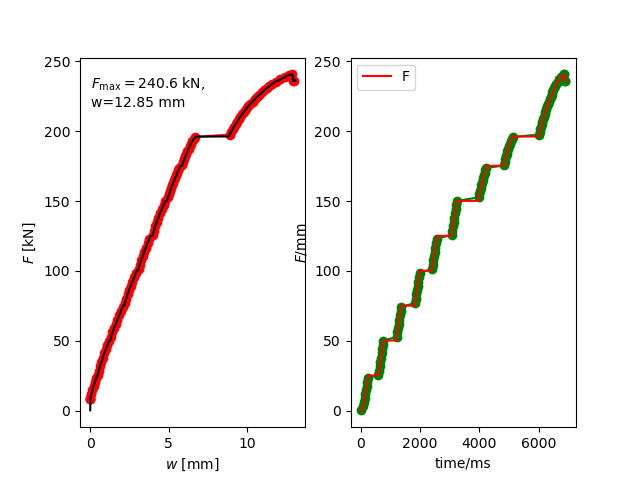

In [11]:
fig, (ax, ax_time) = plt.subplots(1,2)
time, F, w = ld_time.time_F_w_m
ax.plot(ld_time.w_T, ld_time.f_F_time(ld_time.f_time_w(ld_time.w_T)), 'o-', color='red')
ld_time.plot_load_deflection(ax)
ax_time.plot(ld_time.time_T, ld_time.f_F_time(ld_time.time_T), 'o-', color='green')
ld_time.plot_time_F(ax_time)

In [5]:
time_sync.time_shift

-98.03299999999945

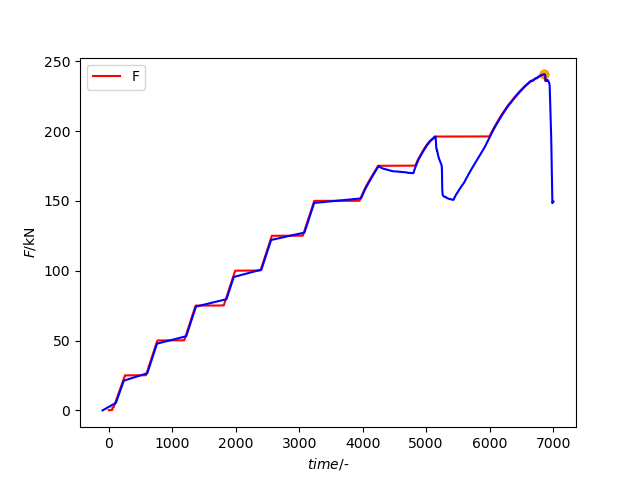

In [6]:
fig, ax = plt.subplots(1,1)
ld_time.plot_time_F(ax)
time_sync.plot_time_F(ax)

In [7]:
time_sync.interact()